#HDF5 Validation

#Alligning and Storing Recent Data 

In [1]:
#%%px --target 1
#%%px --target 0
#%%prun -s cumulative
from Simulation import *
from Pymodules import sciSmooth
from Fmodules import smooth7

In [11]:
folder='./maps/MAPS360x720x2/'
ascname='mask_001k_720x360.asc'
wj_map=genfromtxt(folder+ascname)

In [12]:
for offset in range(-320,-330,-1):
    import netCDF4
    data = netCDF4.Dataset(folder+'fep_test.nc','r')
    cc_map = flipud(data.variables['FEP'][:].data)
    cc_map[cc_map<0]=0
    cc_map = roll(cc_map,offset,axis=1)
    t_map = cc_map.copy()
    t_map[t_map>0]=1
    t_map[t_map<0]=0
    #print(cc_map.max())
    print(offset, linalg.norm(t_map-wj_map,2))

(-320, 48.492209765575012)
(-321, 48.421433049726652)
(-322, 48.395020116164737)
(-323, 48.368582570723653)
(-324, 48.30724026087497)
(-325, 48.334517579776112)
(-326, 48.467302245209737)
(-327, 48.697194859793683)
(-328, 48.983390719017706)
(-329, 49.298875660543295)


In [4]:
import netCDF4
data = netCDF4.Dataset('/Users/Leo/Desktop/Maps_Leo/fep_test.nc','r')
#FEP
#cc_map = flipud(data.variables['FEP'][:].data)
#NPP
cc_map =flipud(data.variables['NPP'][:].data)
cc_map[cc_map<0]=0
cc_map = roll(cc_map,-324,axis=1)
t_map = cc_map.copy()
t_map[t_map>0]=1
t_map[t_map<0]=0
#print(cc_map.max())
#print(linalg.norm(t_map-m_LH,2))

In [5]:
folder='./maps/MAPS360x720x2/'
ascname='mask_000k_720x360.asc'
savetxt(folder+ascname, t_map)
ascname='cc_000k_720x360.asc'
savetxt(folder+ascname, cc_map)

#Scaled optimal net primary productivity

In [23]:
data.variables['NPP'][:].data.max()

2012.1597

In [24]:
450/data.variables['NPP'][:].data.max()

0.22364030407898464

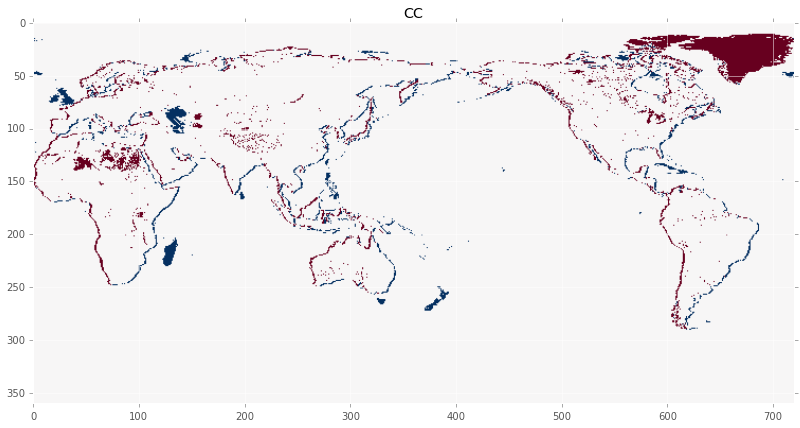

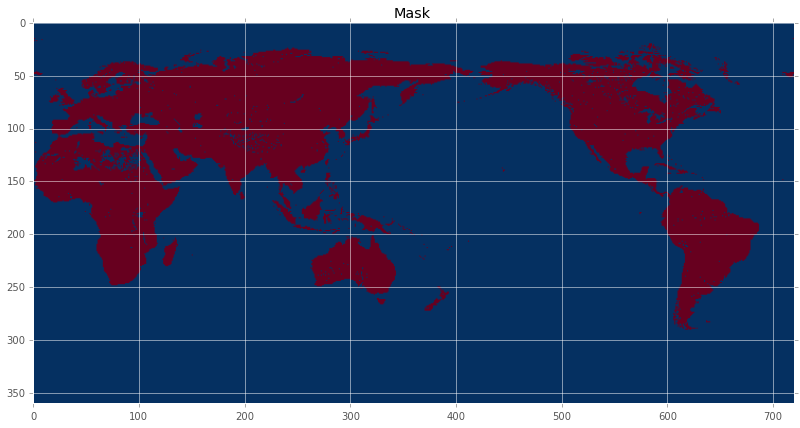

In [6]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(121)
pyplot.title('CC')
im = pyplot.imshow(cc_map, cmap = cm.RdBu)
im = pyplot.imshow(wj_map-t_map, cmap = cm.RdBu_r)
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(122)
pyplot.title('Mask')
im = pyplot.imshow(t_map, cmap = cm.RdBu_r)

In [2]:
#%%px
sim = SerialSimulation('big2',10.,0.,0.001,200)
#sim = HugeSimulation()
print("====="+sim.data.mapsize+" simulation Starting=====")
output = False
module = 'C'

#Deciding which booster to use 
if module == 'Fortran':
    import Fmodules as modules

elif module =='C':
    import Cmodules as modules

elif module =='Python':
    import Pymodules as modules 

Ts = sim.data.Ts
Te = sim.data.Te
tsc = sim.data.tsc
h = sim.data.h
kcfl = sim.data.kcfl
u = sim.data.u      

NS = max(sim.data.NY,sim.data.NX) #find max size 
u0 = zeros(NS)         
u1 = zeros(NS) 
kap0 = zeros(NS)
kaph = zeros(NS)

rows = arange(sim.data.NY)
cols = arange(sim.data.NX)
#Local Rows
#dRow = int(sim.data.NY/mpi.size)
#rowLoc = range(mpi.rank*dRow, (mpi.rank+1)*dRow)

#MPI STUFF
#rowCat = split(rows,mpi.size)
#rowLoc = rowCat[mpi.rank]

#Local Cols
#dCol = int(sim.data.NX/mpi.size)
#colLoc = range(mpi.rank*dCol, (mpi.rank+1)*dCol)
#MPI Stuff
#colCat = split(cols,mpi.size)
#colLoc = colCat[mpi.rank]

yp = yppoints() #Interpolation points   

# read the CC map lists and times=tepoch's for each frame: find first
# Search for appropriate NPP maps:
#      from start time Ts (in kya) to end time Te
#loading carrying capacities from namelist
yalist, masks, tepoch = get_cc_list(sim.data.mapsize)

kstart, kend = findIndex(tepoch,Ts, Te)

# make sure there are at least 2 maps between Ts and Te
if ((kend-kstart)<1) or ((tepoch[kstart]-tepoch[kend])<(Ts-Te)):
   print('Ts=%e, Te=%e, not space enough: kstart=%d, kend=%d\n'%(Ts,Te,kstart,kend))

=====Initializing big2 simulation=====
 INPUT Parameter summary: 
   Number of time steps: NT=330 
   Plotting interval: NPLT=1 
   Diffusion coeff: Kyb = 2.000000e+02 (in km^2/yr)
   Growth rate: Ryb = 1.000000e-03 (in yr^{-1})
   MAP SIZE: NX=720 (E-W), NY=360 (N-S)
   CELL size: dx=dy = 111.6 (km)=   0.2 (eq. (3) units)
   eq. (3) step size h=3.030303e-02, and CFL number=4.863654e-01 

   Start time Ts= 10.0 (kya), NPP frame kstart=50

   End time   Te=  0.0 (kya), NPP frame kend=61

=====big2 simulation Starting=====


#Storing HDF5 Files

In [3]:
storeTemplateMaps(sim.data.mapsize,masks)

('Storing:', 'mask_120k_720x360.asc')
('Storing:', 'mask_116k_720x360.asc')
('Storing:', 'mask_112k_720x360.asc')
('Storing:', 'mask_108k_720x360.asc')
('Storing:', 'mask_104k_720x360.asc')
('Storing:', 'mask_100k_720x360.asc')
('Storing:', 'mask_096k_720x360.asc')
('Storing:', 'mask_092k_720x360.asc')
('Storing:', 'mask_088k_720x360.asc')
('Storing:', 'mask_084k_720x360.asc')
('Storing:', 'mask_080k_720x360.asc')
('Storing:', 'mask_078k_720x360.asc')
('Storing:', 'mask_076k_720x360.asc')
('Storing:', 'mask_074k_720x360.asc')
('Storing:', 'mask_072k_720x360.asc')
('Storing:', 'mask_070k_720x360.asc')
('Storing:', 'mask_068k_720x360.asc')
('Storing:', 'mask_066k_720x360.asc')
('Storing:', 'mask_064k_720x360.asc')
('Storing:', 'mask_062k_720x360.asc')
('Storing:', 'mask_060k_720x360.asc')
('Storing:', 'mask_058k_720x360.asc')
('Storing:', 'mask_056k_720x360.asc')
('Storing:', 'mask_054k_720x360.asc')
('Storing:', 'mask_052k_720x360.asc')
('Storing:', 'mask_050k_720x360.asc')
('Storing:',

In [4]:
storeCC(sim.data.mapsize, masks, yalist)

('Storing:', 'cc_120k_720x360.asc')
('Storing:', 'cc_116k_720x360.asc')
('Storing:', 'cc_112k_720x360.asc')
('Storing:', 'cc_108k_720x360.asc')
('Storing:', 'cc_104k_720x360.asc')
('Storing:', 'cc_100k_720x360.asc')
('Storing:', 'cc_096k_720x360.asc')
('Storing:', 'cc_092k_720x360.asc')
('Storing:', 'cc_088k_720x360.asc')
('Storing:', 'cc_084k_720x360.asc')
('Storing:', 'cc_080k_720x360.asc')
('Storing:', 'cc_078k_720x360.asc')
('Storing:', 'cc_076k_720x360.asc')
('Storing:', 'cc_074k_720x360.asc')
('Storing:', 'cc_072k_720x360.asc')
('Storing:', 'cc_070k_720x360.asc')
('Storing:', 'cc_068k_720x360.asc')
('Storing:', 'cc_066k_720x360.asc')
('Storing:', 'cc_064k_720x360.asc')
('Storing:', 'cc_062k_720x360.asc')
('Storing:', 'cc_060k_720x360.asc')
('Storing:', 'cc_058k_720x360.asc')
('Storing:', 'cc_056k_720x360.asc')
('Storing:', 'cc_054k_720x360.asc')
('Storing:', 'cc_052k_720x360.asc')
('Storing:', 'cc_050k_720x360.asc')
('Storing:', 'cc_048k_720x360.asc')
('Storing:', 'cc_046k_720x36

#Comparing HDF5 data to txtdata

In [5]:
#%%px --target 0
#%%prun -s cumulative

#      start and end maps found
#kmp = kstart # start counting maps here
kmp = kend-1
#u <0 at 
#kmp = 30 
#Ts = tepoch[kmp]

#Read masks 
#Read m_L, t_L
#Read m_H, t_H
t_L = tepoch[kmp]
t_H = tepoch[kmp+1]
m_L = templateMap(sim.data.mapsize, masks, kmp) # template for the 1st map, Leo:too small values
m_H = templateMap(sim.data.mapsize, masks, kmp+1) # template for the 2nd map, Leo:too small values 

#Intermediate mask
#Compute m_LH
#read m_LH
m_LH = (m_L==1)|(m_H==1)

#Read carrying capacities
#Read w_L, w_H
w_L = kapepoch(m_LH, yalist,kmp, sim.data.mapsize) # this is the first map            
w_H = kapepoch(m_LH, yalist, kmp+1, sim.data.mapsize)

# fill in sub-threshold vals for w_L and w_H from m_LH template 
w_L = fillins(w_L, m_L, m_LH, sim.data.mapsize)

#This line is missing 
w_H = fillins(w_H, m_H, m_LH, sim.data.mapsize)

w_L = smooth7(w_L,m_LH)
w_H = smooth7(w_H,m_LH)
w_Lsci = sciSmooth(w_L,m_LH)
w_Hsci = sciSmooth(w_H,m_LH)

#HDF5
#Read masks 
#Read m_L, t_L
#Read m_H, t_H
t_L1 = tepoch[kmp]
t_H1 = tepoch[kmp+1]
#Intermediate mask
#Compute m_LH
#read m_LH

m_LH1 = readTemplateMap(sim.data.mapsize, masks,kmp)

#Read carrying capacities
#Read w_L, w_H
w_L1, w_H1 = readCC(sim.data.mapsize, yalist, kmp)

kmp = kmp + 1                  # increment map count

('t_L, t_L1:', 1, 1)
('t_L, t_L1:', 0, 0)
('error w_L:', 0.0)
('error w_H:', 0.0)


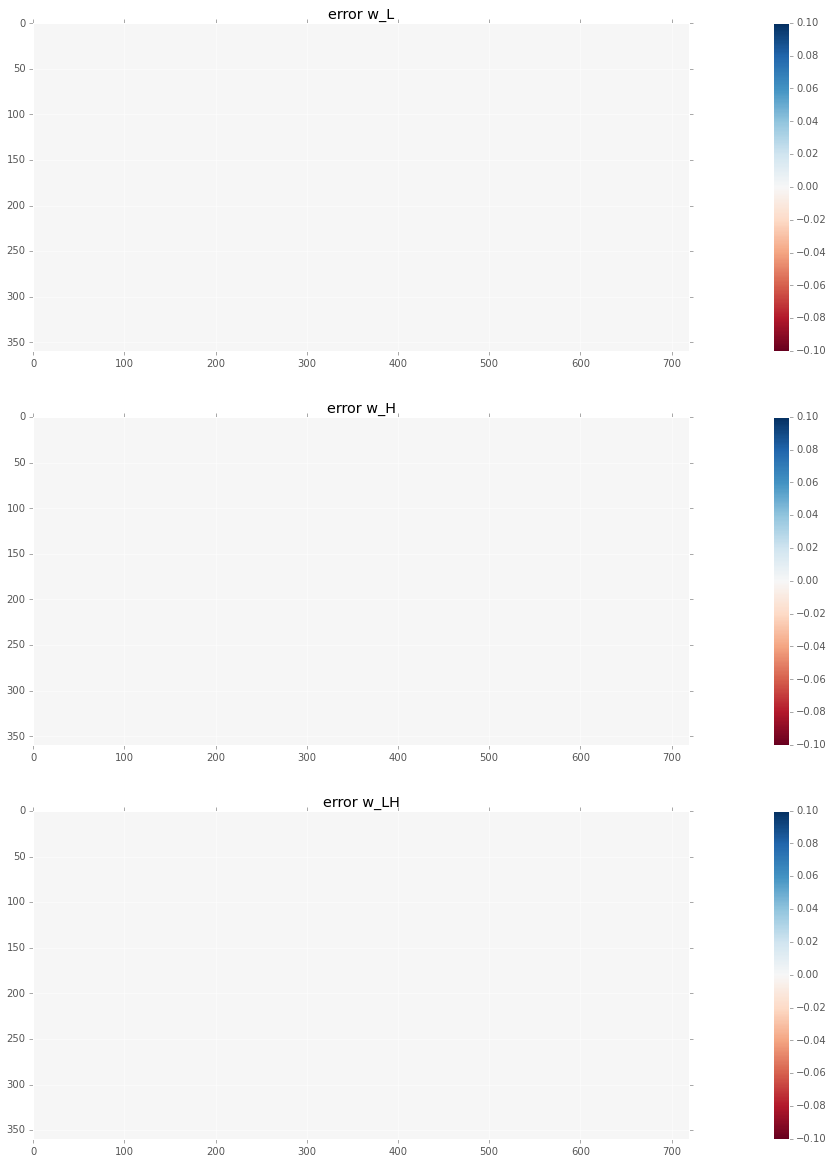

In [6]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(311)
pyplot.title('error w_L')
im = pyplot.imshow(w_L-w_L1, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(312)
pyplot.title('error w_H')
im = pyplot.imshow(w_H-w_H1, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(313)
pyplot.title('error w_LH')
im = pyplot.imshow(m_LH-m_LH1, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
print('t_L, t_L1:',t_L,t_L1)
print('t_L, t_L1:',t_H,t_H1)
print('error w_L:',linalg.norm(w_L-w_L1,2))
print('error w_H:',linalg.norm(w_H-w_H1,2))
#print('error m_LH:',linalg.norm(m_LH-m_LH2,2))

('t_L, t_L1:', 1, 1)
('t_L, t_L1:', 0, 0)
('error w_L:', 8.4823346002792377)
('error w_H:', 8.4823346002792377)


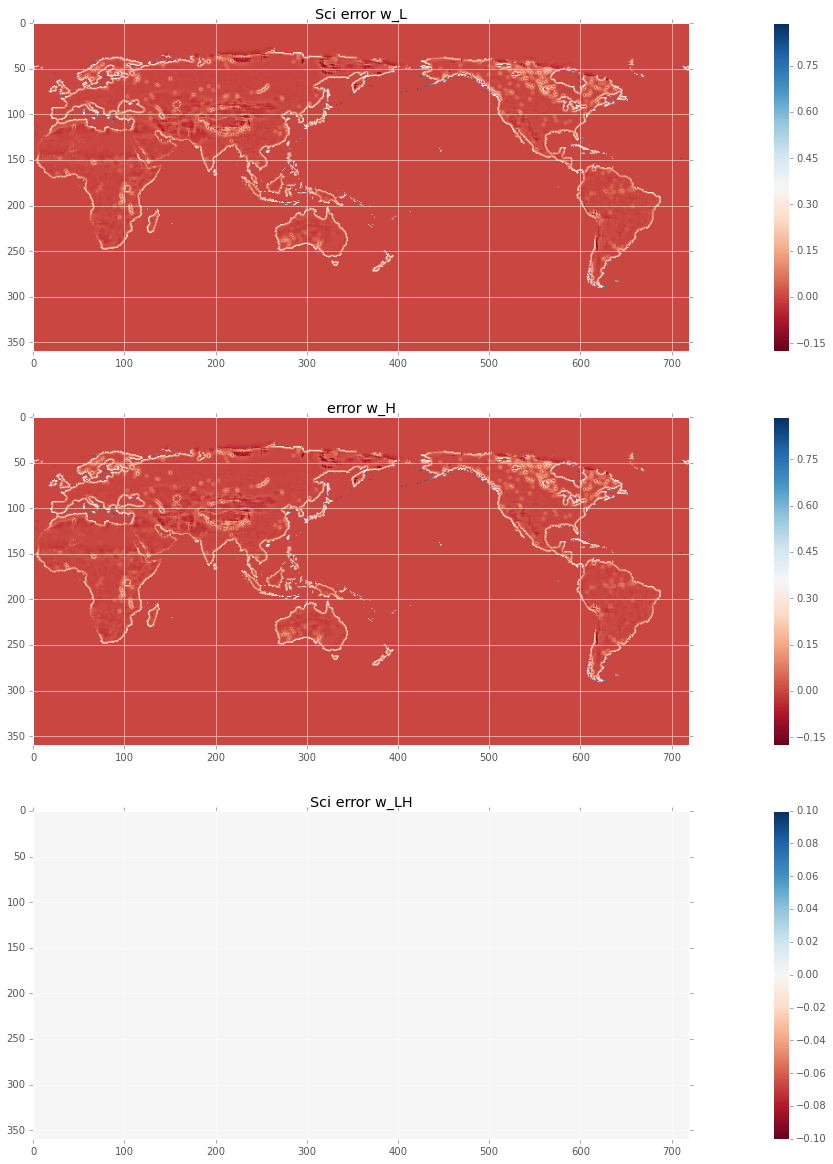

In [7]:
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(311)
pyplot.title('Sci error w_L')
im = pyplot.imshow(w_L-w_Lsci, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(312)
pyplot.title('error w_H')
im = pyplot.imshow(w_H-w_Hsci, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(313)
pyplot.title('Sci error w_LH')
im = pyplot.imshow(m_LH-m_LH1, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
print('t_L, t_L1:',t_L,t_L1)
print('t_L, t_L1:',t_H,t_H1)
print('error w_L:',linalg.norm(w_L-w_Lsci,2))
print('error w_H:',linalg.norm(w_H-w_Hsci,2))
#print('error m_LH:',linalg.norm(m_LH-m_LH2,2))

('t_L, t_L1:', 1, 1)
('t_L, t_L1:', 0, 0)
('error w_L:', 0.0)
('error w_H:', 0.0)
('error m_LH:', 0.0)


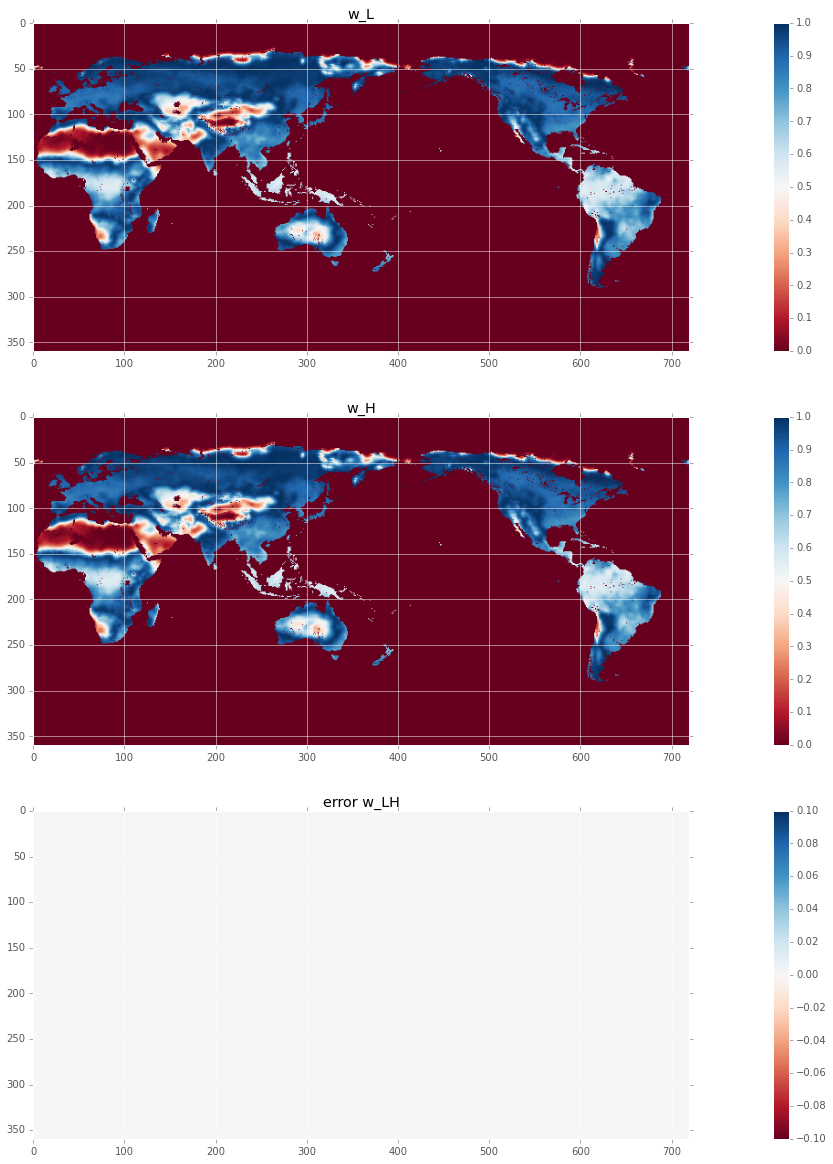

In [8]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(311)
pyplot.title('w_L')
im = pyplot.imshow(w_L, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(312)
pyplot.title('w_H')
im = pyplot.imshow(w_H, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(313)
pyplot.title('error w_LH')
im = pyplot.imshow(m_LH-m_LH1, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
print('t_L, t_L1:',t_L,t_L1)
print('t_L, t_L1:',t_H,t_H1)
print('error w_L:',linalg.norm(w_L-w_L1,2))
print('error w_H:',linalg.norm(w_H-w_H1,2))
print('error m_LH:',linalg.norm(m_LH-m_LH1,2))

#Start Simulation

In [32]:
#%%px --target 1
#Using Jed's map
#if self.data.mapsize =='big':
#    import netCDF4
#    data = netCDF4.Dataset('/Users/Leo/Desktop/Maps_Leo/fep_test.nc','r')
#    w_J = flipud(data.variables['FEP'][:].data)
#    w_J = roll(w_J,-310,axis=1)
#    w_J[w_J<0]=0
#    w_L = w_J.copy()
#    w_H = w_J.copy()
#    t_L = tepoch[kmp]
#    kmp = kmp + 1                  # increment map count
#    t_H = tepoch[kmp]
#else:

# Scan through map, construct segments for X and Y directions 
#Python scanners
nxsegs, xstart_seg, xend_seg = Xscan(m_LH)
nysegs, ystart_seg, yend_seg = Yscan(m_LH)
#Fortran scanners
#nxsegs, xstart_seg, xend_seg = FXscan(m_LH)
#nysegs, ystart_seg, yend_seg = FYscan(m_LH)

#w_H = kapepoch(self.data.w_map,yalist,kmp, self.data.mapsize) # second map
#t_H = tepoch[kmp]

#Computing interpolation weights 
s   = (t_L-Ts+tsc*h)/(t_L-t_H)  # first step interpolation parameter
wt0 = 0.0
# compute interpoated weight to get to step t=h
ks  = floor(100*s)
sd  = 100*s - ks               # residual sd = 100*s mod 1
#wth = yp[0]*(1-sd) + yp[1]*sd  # first interpolant
wth = yp[ks]*(1-sd) + yp[ks+1]*sd  # first interpolant
t   = Ts                       # this is real time in kya

# TGL alternates between 1 and 0 
TGL = True
imID = 0
#TGL = False

# BEGIN main loop
# self.NT = 1

In [33]:
#%%px
def step1X(rowsLoc):
    locX = 0
    rowIn = 0 
    for row in rowsLoc:
        nSegs = nxsegs[rowIn] #Number of segments
        rowIn = rowIn+1
        for k in range(0,nSegs):
            colStart=xstart_seg[locX+k] #From: segment starts
            colEnd=xend_seg[locX+k] #To:segmend ends
            nInSeg=colEnd-colStart+1 #Number of inner segments

            u1[1:nInSeg+1] = u[row,colStart:colEnd+1]

            #Dirichlet B.C.
            u1[0] = 0 # water cells 
            u1[nInSeg+1] = 0 #Water cells

            #Neumann B.C 
            #u1[0] = u1[1]
            #u1[nInSeg+1] = u1[nInSeg]


            #ut = godunovstep1(ninseg+2,h,kcfl,u1,sc1,sc2)
            #Booster Subroutine
            ut = modules.godunovstep1(h,kcfl,u1[0:nInSeg+2])
            u[row,colStart:colEnd+1] = ut[1:nInSeg+1]

        locX = locX + nSegs #Number of scanned segments

def stepY(colsLoc):    
    locY = 0
    colIn = 0 
    for col in colsLoc:
        nSegs = nysegs[colIn]
        colIn = colIn + 1 
        for k in range(0,nSegs):
            rowStart=ystart_seg[locY+k]
            rowEnd=yend_seg[locY+k]
            nInSeg=rowEnd-rowStart+1

            #print('u0:', u0[1:nInSeg+1].shape) # (2,), (26,), (2,))
            #print('u:',u[rowStart:rowEnd+1,col].shape) # (0,), (0,), (0,))
            u0[1:nInSeg+1] = u[rowStart:rowEnd+1,col]
            kap0[1:nInSeg+1] = w_L[rowStart:rowEnd+1,col]*(1-wt0) + w_H[rowStart:rowEnd+1,col]*wt0
            kaph[1:nInSeg+1] = w_L[rowStart:rowEnd+1,col]*(1-wth) + w_H[rowStart:rowEnd+1,col]*wth

            kap0[0] = 1 #??
            kap0[nInSeg+1] = 1 #??
            kaph[0] = 1  #??
            kaph[nInSeg+1] = 1 ##??

            #Dirichlet B.C.
            u0[0] = 0 
            u0[nInSeg+1] = 0

            #Neumann B.C 
            #u0[0] = u0[1]
            #u0[nInSeg+1] = u0[nInSeg]

            #ut = godunovstep2(ninseg+2,h,kcfl,u0,sc1,sc2,kap0,kaph)
            #Booster Subroutine
            ut = modules.godunovstep2(h,kcfl,u0[0:nInSeg+2],kap0[0:nInSeg+2],kaph[0:nInSeg+2])

            u[rowStart:rowEnd+1,col] = ut[1:nInSeg+1]

        locY = locY + nSegs
        
def step1Y(colsLoc):        
    locY = 0
    colIn = 0 
    for col in colsLoc:
        nSegs = nysegs[colIn] #Number of segments 
        colIn = colIn + 1
        for k in range(0,nSegs):
            rowStart=ystart_seg[locY+k] #From: segment starts
            rowEnd=yend_seg[locY+k] #To:segmend ends
            nInSeg=rowEnd-rowStart+1

            u0[1:nInSeg+1] = u[rowStart:rowEnd+1,col]

            #Dirichlet b.c.
            u0[0] = 0
            u0[nInSeg+1] = 0
            #Neumann B.C 
            #u0[0] = u0[1]
            #u0[nInSeg+1] = u0[nInSeg]

            #ut = godunovstep1(ninseg+2,h,kcfl,u0,sc1,sc2)
            #Booster Subroutine
            ut = modules.godunovstep1(h,kcfl,u0[0:nInSeg+2])
            u[rowStart:rowEnd+1,col] = ut[1:nInSeg+1]

        locY = locY + nSegs

def stepX(rowsLoc):
    locX = 0
    rowIn = 0 
    for row in rowsLoc:
        nSegs = nxsegs[rowIn]
        rowIn = rowIn + 1
        for k in range(0,nSegs):
            colStart=xstart_seg[locX+k]
            colEnd=xend_seg[locX+k]
            nInSeg=colEnd-colStart+1

            kap0[0] = 1 
            kap0[nInSeg+1] = 1
            kaph[0] = 1
            kaph[nInSeg+1] = 1

            u1[1:nInSeg+1] = u[row,colStart:colEnd+1]
            kap0[1:nInSeg+1] = w_L[row,colStart:colEnd+1]*(1-wt0) + w_H[row,colStart:colEnd+1]*wt0
            #No interpolation
            #kap0[1:ninseg+1] = w_L[i,jstart:jend+1]
            kaph[1:nInSeg+1] = w_L[row,colStart:colEnd+1]*(1-wth) + w_H[row,colStart:colEnd+1]*wth
            #No interpolation
            #kaph[1:ninseg+1] = w_L[i,jstart:jend+1]

            #Dirichlet b.c.
            u1[0] = 0 
            u1[nInSeg+1] = 0
            #Neumann B.C 
            #u1[0] = u1[1]
            #u1[nInSeg+1] = u1[nInSeg]


            #ut = godunovstep2(ninseg+2,h,kcfl,u1,sc1,sc2,kap0,kaph)
            #Fortran Subroutine
            ut = modules.godunovstep2(h,kcfl,u1[0:nInSeg+2],kap0[0:nInSeg+2],kaph[0:nInSeg+2])
            u[row,colStart:colEnd+1] = ut[1:nInSeg+1]


        locX = locX + nSegs

def plotting(u_plot):
    from  matplotlib import pyplot 
    import matplotlib.cm as cm
    print("=====Plotting Results=====")
    fig = pyplot.figure(figsize=(5,5))
    pyplot.subplot(111)
    pyplot.title('Data')
    im = pyplot.imshow(u_plot, cmap = cm.RdBu_r)
    cb = pyplot.colorbar()

In [34]:
#%%time
# BEGIN main loop
# sim.NT = 1
#it = 0
start = timer()
for it in range(0,350):
#for it in range(0,self.data.NT):
    #%debug 0
    print('iteration=',it) 
    if TGL: #First choice: half-step1 in X, and step 2 in Y 
        #half-step1 in X

        step1X(rows)
        #dview.scatter('u',u)
        #dview.apply(step1X,parallel.Reference('rows'))
        #u = dview.gather('u')

        #step2 in Y-Direction
        stepY(cols)
        #dview.scatter('u',u)
        #dview.apply(stepY,parallel.Reference('cols'))
        #u = dview.gather('u')

        #half-step1 in X-Direction
        step1X(rows)
        #dview.scatter('u',u)
        #dview.apply(step1X,parallel.Reference('rows'))
        #u = dview.gather('u')

        TGL = False

    else:
        ##Second choice: half-step1 in Y, and step 2 in X 
        #half-step1 in Y
        step1Y(cols)
        #dview.scatter('u',u)
        #dview.apply(step1Y,parallel.Reference('cols'))
        #u = dview.gather('u')

        #Step 2 : X direction updates
        stepX(rows)
        #dview.scatter('u',u)
        #dview.apply(stepX,parallel.Reference('rows'))
        #u = dview.gather('u')
        #dview.scatter('u',u)

        # half step1 in Y direction
        step1Y(cols)
        #dview.scatter('u',u)
        #dview.apply(step1Y,parallel.Reference('cols'))
        #u = dview.gather('u')
        #dview.scatter('u',u)

        TGL = True

    if sim.data.u.min()<0:
    #if it == 330 and kmp ==30:
        print('u:min<0')
        print('kmp:', kmp)
        break 
        
    #if kmp > kend: 
    #    print 'break hit, leaving loop'
    #    break

    # increment t value, reset weights and maps if necessary
    t = t - tsc*h          # decrement t in kya
    #fprintf(' ordinary step: t_L=%e, t=%e, t_H=%e\n',t_L,t,t_H);
    if t > t_H:              # usual case, maps not exhausted
        wt0 = wth           # shift lower weight down
        s   = (t_L-t)/(t_L-t_H)  # interpolation parameter
        ks  = floor(100*s)
        sd  = 100*s - ks    # residual sd = 100*s mod 1
        wth = yp[ks]*(1-sd) + yp[ks+1]*sd  # first interpolant
    else:                   # reached upper map time 
        kmp = kmp +1                      # increment map count
        if kmp <= kend:               # kend is the last map
            print('Swapping maps')
            print('kmp:',kmp)
            m_L = m_H
            w_L = w_H                 # set lower map to prev. upper
            t_L = t_H                 # set lower time to prev. upper
            #if self.data.mapsize =='big':
            #    w_H = w_J.copy()
            #else:
            #Leo: Error that make things work 
            #w_H = templateMap(sim.data.mapsize, masks, kmp)
            m_H = templateMap(sim.data.mapsize, masks, kmp)
            m_LH = (m_L==1) | (m_H==1)
            
            nxsegs, xstart_seg, xend_seg = Xscan(m_LH)
            nysegs, ystart_seg, yend_seg = Yscan(m_LH)
            #nxsegs, xstart_seg, xend_seg = FXscan(m_LH)
            #nysegs, ystart_seg, yend_seg = FYscan(m_LH)

            w_L = fillins(w_L, m_L, m_LH, sim.data.mapsize)
            #w_H = kapepoch(self.data.w_map, yalist, kmp, self.data.mapsize)  # read next map
            w_H = kapepoch(m_LH, yalist, kmp, sim.data.mapsize)
            w_H = fillins(w_H, m_H, m_LH, sim.data.mapsize)
            t_H = tepoch[kmp]         # time frame of new map
            
            #Smoothing Carrying capacities 
            #w_L = smooth7(w_L,m_LH)
            #w_H = smooth7(w_L,m_LH)
            w_L = sciSmooth(w_L,m_LH)
            w_H = sciSmooth(w_L,m_LH)
            
            #HDF5 
            m_LH1 = readTemplateMap(sim.data.mapsize, masks,kmp-1)
            #Read carrying capacities
            #Read w_L, w_H
            w_L1, w_H1 = readCC(sim.data.mapsize, yalist, kmp-1)
            
            wt0 = 0
            s   = (t_L - t)/(t_L-t_H)  # interpolation parameter
            ks  = floor(100*s)
            sd  = 100*s - ks                    # mod1 interpolation 
            wth = yp[ks]*(1-sd) + yp[ks+1]*sd  # first interpolant
            
            
    ##Monitoring data
    if (mod(it,sim.data.NPLT)==0)or(it==sim.data.NT):
        if t < 10:
            tstr = '   %4.2f'%t
            print(tstr)
            if output:
                store(imID, sim.data)

        else:
            tstr = '   %4.1f'%t
            print(tstr)
            if output:
                storeData(imID, sim.data)

end = timer()
print("====="+sim.data.mapsize+" simulation completed=====")
print('   Main Loop Time:', end-start)
#it = it +1

|----------| 0/350   0% [elapsed: 00:00 left: ?, ? iters/sec]('iteration=', 0)
   9.97
('iteration=', 1)
('iteration=', 2)
|----------| 3/350   0% [elapsed: 00:00 left: 01:07,  5.14 iters/sec]('iteration=', 3)
('iteration=', 4)
('iteration=', 5)
('iteration=', 6)
|----------| 7/350   2% [elapsed: 00:01 left: 01:01,  5.60 iters/sec]('iteration=', 7)
('iteration=', 8)
('iteration=', 9)
('iteration=', 10)
|----------| 11/350   3% [elapsed: 00:01 left: 00:58,  5.76 iters/sec]('iteration=', 11)
('iteration=', 12)
('iteration=', 13)
|----------| 14/350   4% [elapsed: 00:02 left: 00:57,  5.80 iters/sec]('iteration=', 14)
('iteration=', 15)
('iteration=', 16)
('iteration=', 17)
|----------| 18/350   5% [elapsed: 00:03 left: 00:56,  5.87 iters/sec]('iteration=', 18)
('iteration=', 19)
('iteration=', 20)
('iteration=', 21)
|----------| 22/350   6% [elapsed: 00:03 left: 00:55,  5.92 iters/sec]('iteration=', 22)
('iteration=', 23)
('iteration=', 24)
('iteration=', 25)
|----------| 26/350   7% [ela

In [35]:
#Using scipy smoother
#0.877574108845
#0.0

#Using fortran smooth7
#0.875015601812
#0.0

#Bug:
#0.875657385733
#-0.00141607548255
#Wrong
#0.875657579177
#0.0
print(sim.data.u.max())
print(sim.data.u.min())

0.886338828659
0.0


In [51]:
#(array([171]), array([52]))
#-0.00141607548255
#0.917830404978
#8.61405e-05 #w_H Very low : here is the gist 
#True
#1.0
#0.0

#0.152912797919
#0.917830404978
#0.893197058226 w_H Very high 
#True
#1.0
#1.0

print(where(sim.data.u<0))
print(u[171,52])
print(w_L[171,52])
print(w_H[171,52])
print(m_LH[171,52])
print(m_L[171,52])
print(m_H[171,52])
print(w_H[171-2:171+3,52-2:52+3])

(array([171]), array([52]))
-0.00141607548255
0.917830404978
8.61405e-05
True
1.0
0.0
[[  9.05646363e-01   8.97735206e-01   8.89586936e-01   8.81089656e-01
    8.72353231e-01]
 [  9.14740029e-01   9.08659202e-01   9.02309105e-01   8.93292052e-01
    8.83984125e-01]
 [  8.61405000e-05   9.19140706e-01   8.61405000e-05   8.61405000e-05
    8.95182940e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]


In [12]:
#0.999993697182 0.999999834527
print(wt0,wth)

0.999993697182 0.999999834527


In [13]:
kap0 = w_L*(1-wt0)+w_H*wt0
kaph = w_L*(1-wth)+w_H*wth

In [14]:
#Bug:
#9.19248748574e-05
#8.62923618842e-05

#Wrong values 
#0.893197213486
#0.893197062302
print(kap0[171,52])
print(kaph[171,52])

9.18666158192e-05
8.62908323624e-05


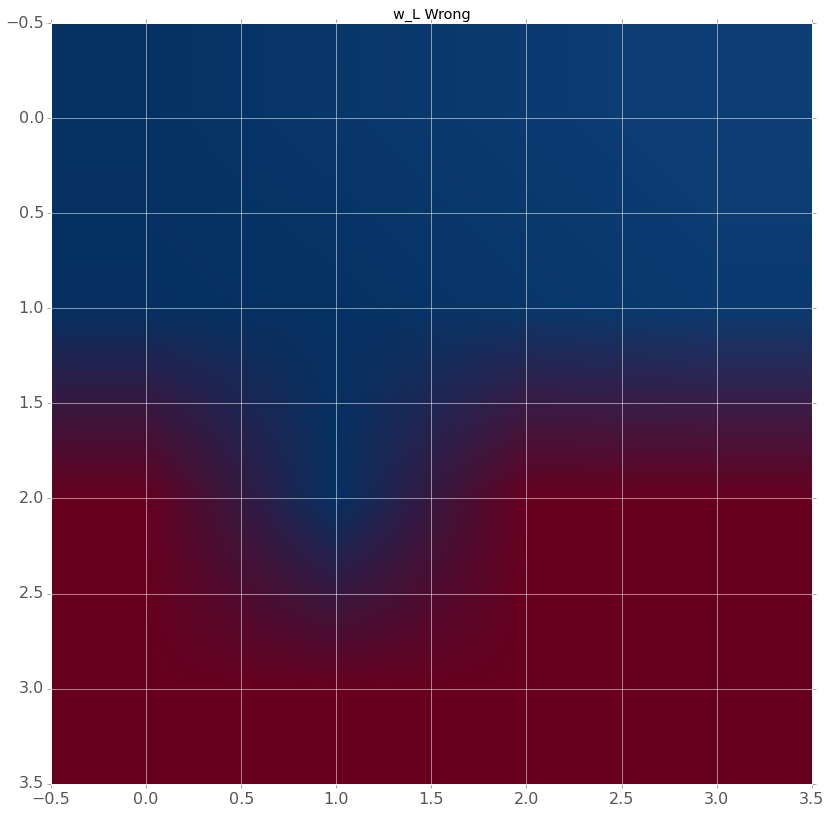

In [15]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(121)
pyplot.title('w_L Wrong')
im = pyplot.imshow(w_H[171-2:171+2,52-2:52+2], cmap = cm.RdBu)

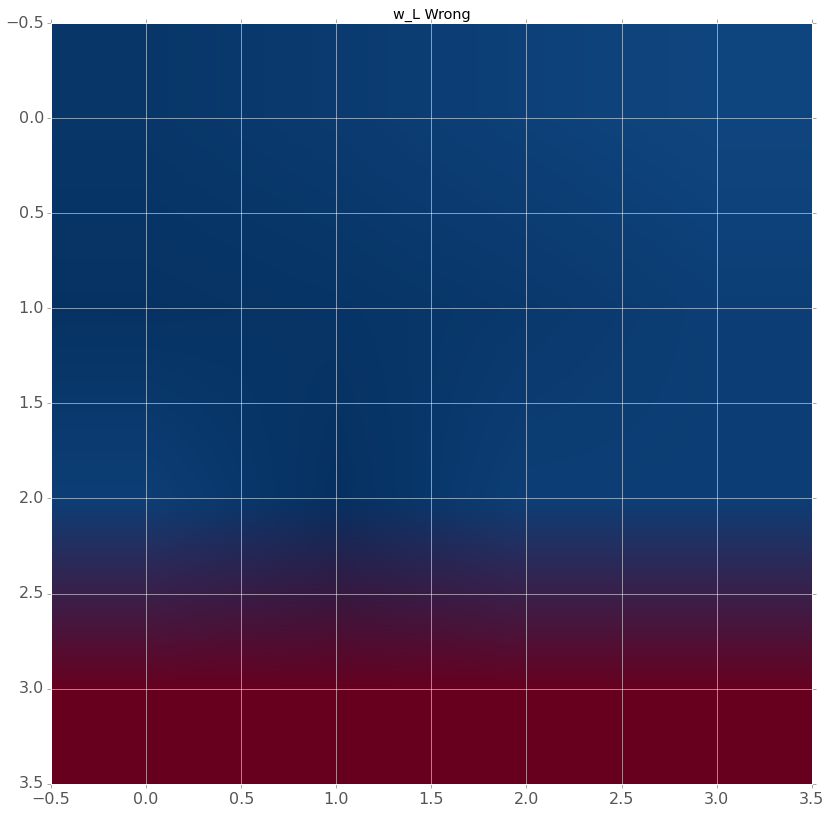

In [22]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(121)
pyplot.title('w_L Wrong')
im = pyplot.imshow(w_H[171-2:171+2,52-2:52+2], cmap = cm.RdBu)

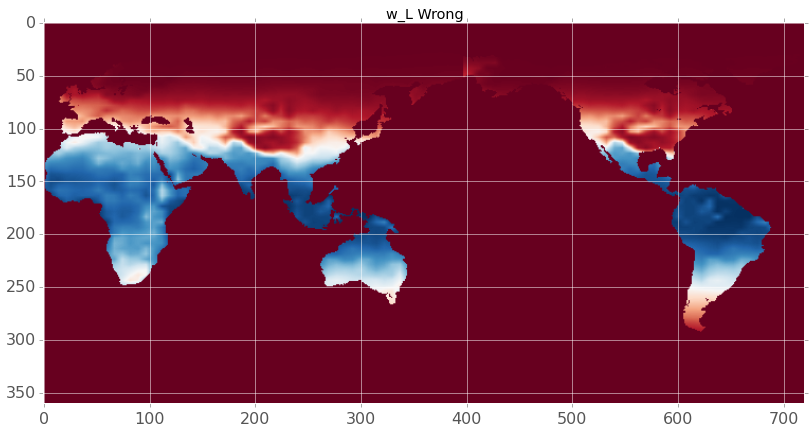

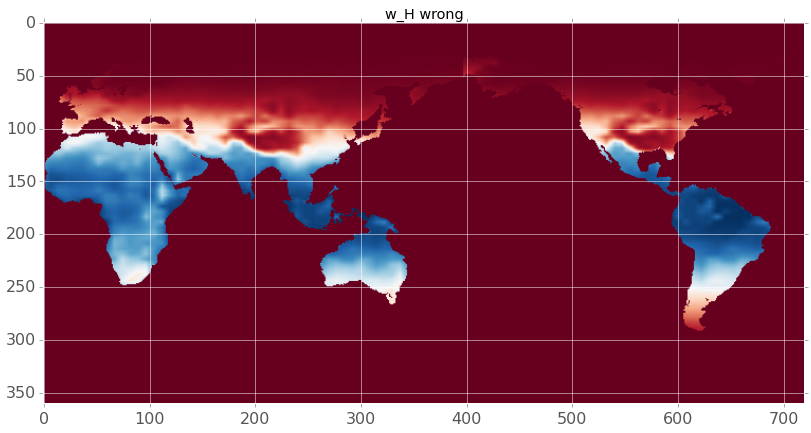

In [15]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(121)
pyplot.title('w_L Wrong')
im = pyplot.imshow(w_L, cmap = cm.RdBu)
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(122)
pyplot.title('w_H wrong')
im = pyplot.imshow(w_H, cmap = cm.RdBu)

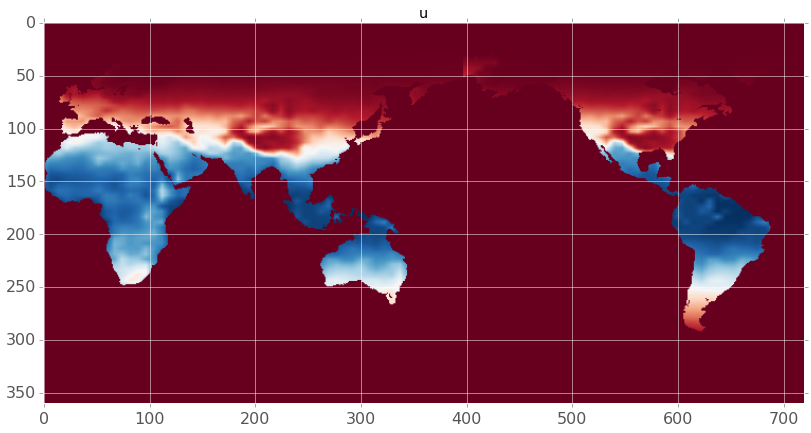

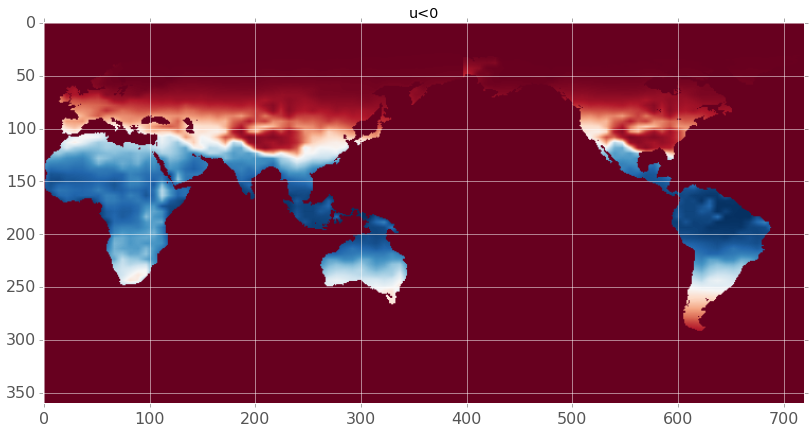

In [20]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(121)
pyplot.title('u')
im = pyplot.imshow(w_L, cmap = cm.RdBu)
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(122)
pyplot.title('u<0')
im = pyplot.imshow(w_H, cmap = cm.RdBu)

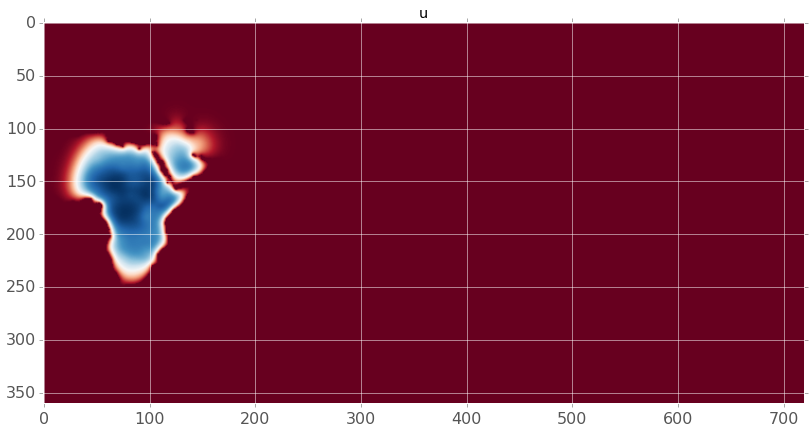

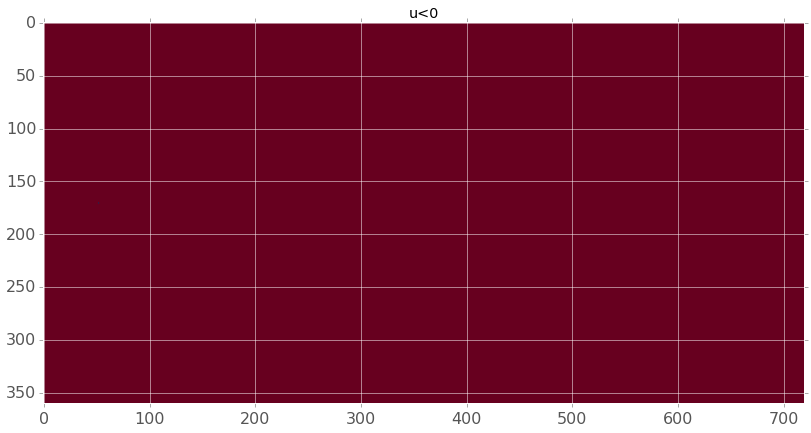

In [13]:
%matplotlib inline
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(121)
pyplot.title('u')
im = pyplot.imshow(sim.data.u, cmap = cm.RdBu)
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(122)
pyplot.title('u<0')
im = pyplot.imshow((sim.data.u<0), cmap = cm.RdBu)

In [9]:
#      start and end maps found
#kmp = kstart # start counting maps here
kmp = 0 
#Read masks 
#Read m_L, t_L
#Read m_H, t_H
t_L = tepoch[kmp]
t_H = tepoch[kmp+1]
m_L = templateMap(sim.data.mapsize, masks, kmp) # template for the 1st map, Leo:too small values
m_H = templateMap(sim.data.mapsize, masks, kmp+1) # template for the 2nd map, Leo:too small values 

#Intermediate mask
#Compute m_LH
#read m_LH
m_LH = (m_L==1)|(m_H==1)

#Read carrying capacities
#Read w_L, w_H
w_L = kapepoch(m_LH, yalist,kmp, sim.data.mapsize) # this is the first map            
w_H = kapepoch(m_LH, yalist, kmp+1, sim.data.mapsize)

# fill in sub-threshold vals for w_L and w_H from m_LH template 
w_L = fillins(w_L, m_L, m_LH)

#This line is missing 
w_H = fillins(w_H, m_H, m_LH)

#HDF5
#Read masks 
#Read m_L, t_L
#Read m_H, t_H
t_L1 = tepoch[kmp]
t_H1 = tepoch[kmp+1]
#Intermediate mask
#Compute m_LH
#read m_LH
m_LH1 = readTemplateMap(sim.data.mapsize, masks,kmp)

#Read carrying capacities
#Read w_L, w_H
w_L1, w_H1 = readCC(sim.data.mapsize, yalist, kmp)

kmp = kmp + 1                  # increment map count

TypeError: fillins() missing 1 required positional argument: 'mapsize'

kmp: 30
t_L, t_L1: 42 50
t_H, t_H1: 40 48
error w_L: 0.0
error w_H: 0.0
error m_LH: 0.0


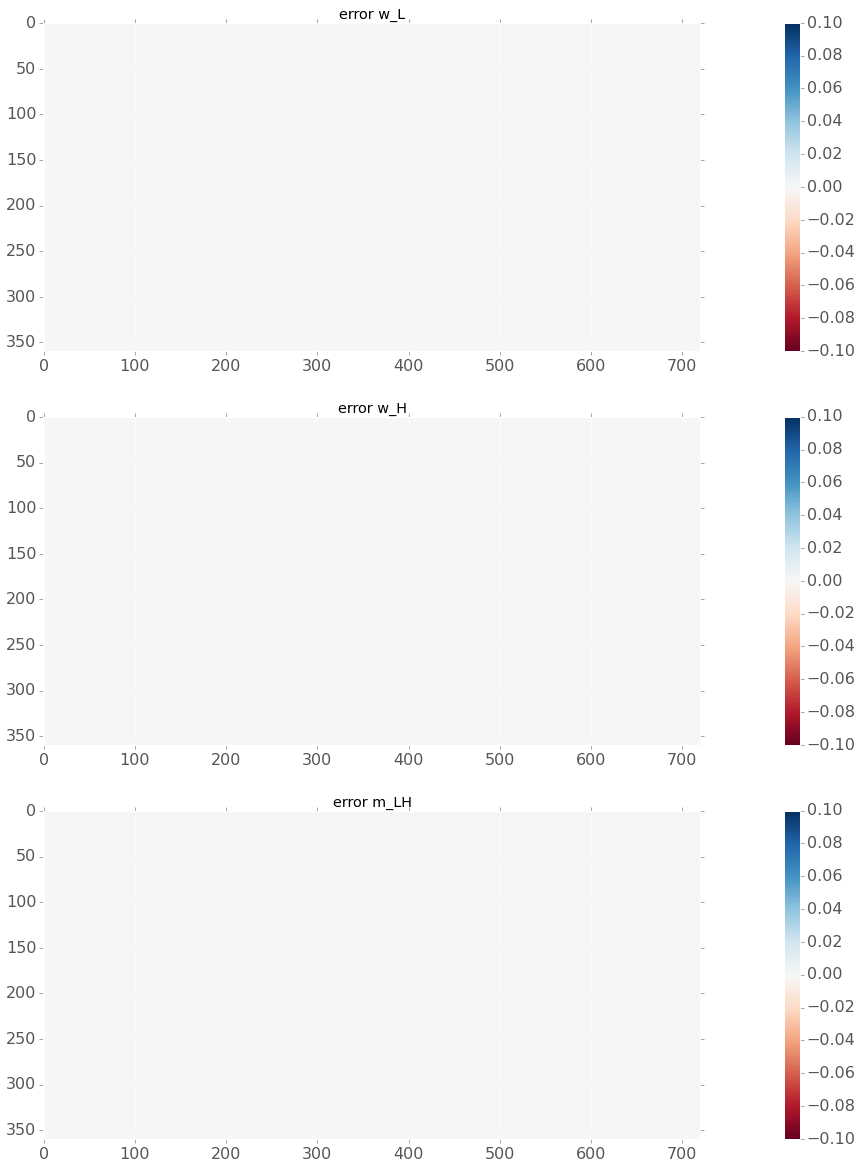

In [39]:
%matplotlib inline
print('kmp:', kmp)
from  matplotlib import pyplot
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(311)
pyplot.title('error w_L')
im = pyplot.imshow(w_L-w_L1, cmap = cm.RdBu)
#im = pyplot.imshow(w_L, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(312)
pyplot.title('error w_H')
im = pyplot.imshow(w_H-w_H1, cmap = cm.RdBu)
#im = pyplot.imshow(w_L1, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
pyplot.subplot(313)
pyplot.title('error m_LH')
im = pyplot.imshow(m_LH-m_LH1, cmap = cm.RdBu)
#im = pyplot.imshow(w_L-w_L1, cmap = cm.RdBu)
#pyplot.clim(-1,1)
cb = pyplot.colorbar()
print('t_L, t_L1:',t_L,t_L1)
print('t_H, t_H1:',t_H,t_H1)
print('error w_L:',linalg.norm(w_L-w_L1,2))
print('error w_H:',linalg.norm(w_H-w_H1,2))
print('error m_LH:',linalg.norm(m_LH-m_LH1,2))

In [36]:
kmp = kmp +1                      # increment map count
#if kmp <= kend:               # kend is the last map
print('Swapping maps')
print('kmp:',kmp)
m_L = m_H
w_L = w_H                 # set lower map to prev. upper
t_L = t_H                 # set lower time to prev. upper
#if self.data.mapsize =='big':
#    w_H = w_J.copy()
#else:
m_H = templateMap(sim.data.mapsize, masks, kmp) #Error here ... this is supposed to be m_H 
m_LH = (m_L==1) | (m_H==1)
#m_LH2 = (m_L==0) | (m_H==0)

nxsegs, xstart_seg, xend_seg = Xscan(m_LH)
nysegs, ystart_seg, yend_seg = Yscan(m_LH)
#nxsegs, xstart_seg, xend_seg = FXscan(m_LH)
#nysegs, ystart_seg, yend_seg = FYscan(m_LH)

w_L = fillins(w_L, m_L, m_LH)
#w_H = kapepoch(self.data.w_map, yalist, kmp, self.data.mapsize)  # read next map
w_H = kapepoch(m_LH, yalist, kmp, sim.data.mapsize)
w_H = fillins(w_H, m_H, m_LH)
t_H = tepoch[kmp]         # time frame of new map

#HDF5 
m_LH1 = readTemplateMap(sim.data.mapsize, masks,kmp-1)
#Read carrying capacities
#Read w_L, w_H
w_L1, w_H1 = readCC(sim.data.mapsize, yalist, kmp-1)

Swapping maps
kmp: 13


In [15]:
yalist

('cc_120k_720x360.asc',
 'cc_116k_720x360.asc',
 'cc_112k_720x360.asc',
 'cc_108k_720x360.asc',
 'cc_104k_720x360.asc',
 'cc_100k_720x360.asc',
 'cc_096k_720x360.asc',
 'cc_092k_720x360.asc',
 'cc_088k_720x360.asc',
 'cc_084k_720x360.asc',
 'cc_080k_720x360.asc',
 'cc_078k_720x360.asc',
 'cc_076k_720x360.asc',
 'cc_074k_720x360.asc',
 'cc_072k_720x360.asc',
 'cc_070k_720x360.asc',
 'cc_068k_720x360.asc',
 'cc_066k_720x360.asc',
 'cc_064k_720x360.asc',
 'cc_062k_720x360.asc',
 'cc_060k_720x360.asc',
 'cc_058k_720x360.asc',
 'cc_056k_720x360.asc',
 'cc_054k_720x360.asc',
 'cc_052k_720x360.asc',
 'cc_050k_720x360.asc',
 'cc_048k_720x360.asc',
 'cc_046k_720x360.asc',
 'cc_044k_720x360.asc',
 'cc_042k_720x360.asc',
 'cc_040k_720x360.asc',
 'cc_038k_720x360.asc',
 'cc_036k_720x360.asc',
 'cc_034k_720x360.asc',
 'cc_032k_720x360.asc',
 'cc_030k_720x360.asc',
 'cc_028k_720x360.asc',
 'cc_026k_720x360.asc',
 'cc_024k_720x360.asc',
 'cc_022k_720x360.asc',
 'cc_021k_720x360.asc',
 'cc_020k_720x36

In [25]:
w_L1, w_H1 = readCC('big_bristol', yalist, 0)
#w_L2, w_H2 = readCC('big', yalist, 1)

KeyError: 'Unable to open object (Component not found)'

In [26]:
%debug

> /Users/Leo/Desktop/MasterThesis/populationdynamics/h5py/h5o.pyx(190)h5py.h5o.open (-------src-dir--------/h5py/h5o.c:3507)()

ipdb> up
> /Users/Leo/anaconda/lib/python2.7/site-packages/h5py/_hl/group.py(164)__getitem__()
    163         else:
--> 164             oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
    165 

ipdb> up
> /Users/Leo/Desktop/MasterThesis/populationdynamics/toolsWaves.py(666)readCC()
    665     #read data
--> 666     kapL=f[mapsize+'/kapL/'+ccList[kmp]].value
    667     kapH=f[mapsize+'/kapH/'+ccList[kmp]].value

ipdb> ccList[kmp]
'cc_120k_720x360.asc'
ipdb> f
<HDF5 file "big_bristol_kap.hdf5" (mode r)>
ipdb> f.get_keys()
*** AttributeError: 'File' object has no attribute 'get_keys'
ipdb> f
<HDF5 file "big_bristol_kap.hdf5" (mode r)>
ipdb> f
<HDF5 file "big_bristol_kap.hdf5" (mode r)>
ipdb> ccList[kmp]
'cc_120k_720x360.asc'
ipdb> exit


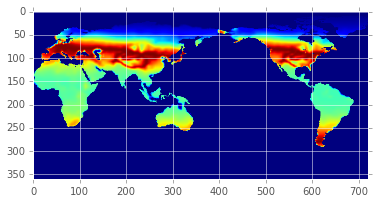

In [22]:
pyplot.imshow(w_L2)

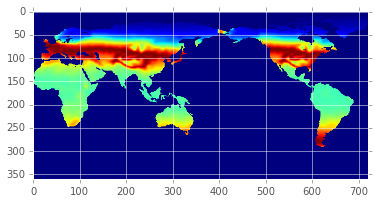

In [23]:
pyplot.imshow(w_H2)